In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
X, y = make_moons(noise = 0.2)

In [72]:
X.shape, y.shape

((100, 2), (100,))

Text(0,0.5,'x2')

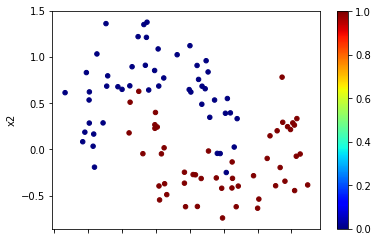

In [73]:
import pandas as pd
df = pd.DataFrame(X)
df.plot.scatter(0, 1, c=y, cmap='jet')
plt.xlabel('x1')
plt.ylabel('x2')

### Build a Logistic Regression model that classifies a point as red or blue based on its position (x1, x2)

We would like to find the coefficients (a1, a2, b) of the logistic function that result in the smallest possible log loss (then the prediction will be the most accurate).

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
m = LogisticRegression()                             # create the model
m.fit(X, y)                                          # train the model -> find best coefficients

m.coef_, m.intercept_

(array([[ 0.97341145, -2.67452471]]), array([0.14710702]))

In [76]:
f'a1: {m.coef_[0][0]}   a2: {m.coef_[0][1]}    b: {m.intercept_[0]}'

'a1: 0.9734114477999746   a2: -2.6745247088167945    b: 0.14710702373967816'

In [77]:
m.score(X, y)   # calculates the accuracy (another metric)

0.85

In [78]:
ypred = m.predict(X)   # predicts the data points

In [79]:
ypred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

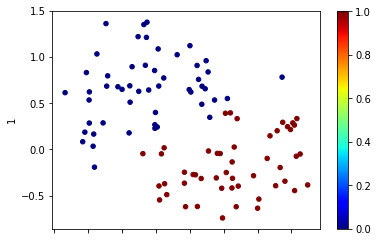

In [80]:
df.plot.scatter(0, 1, c=ypred, cmap='jet')

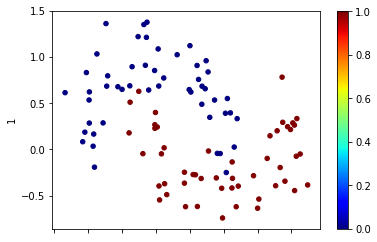

In [81]:
df.plot.scatter(0, 1, c=y, cmap='jet')

In [1]:
import pandas as pd 

def import_data(data):
    _filedir = '/Users/michel/coding/jupyter/_data/'
    _filename = data
    _file = _filedir + _filename + '.csv'
    return _file


In [2]:
df = pd.read_csv(import_data('train'))
data = pd.read_csv(import_data('train'))

In [10]:
X = df[["Pclass","Sex","Age"]]
y = df['Survived']

In [11]:
df['female'] = pd.factorize(df['Sex'])[0]

In [5]:
df['child'] = (df['Age'] < 14).astype(int)


In [6]:
df['female_pclass'] = df['female'] * df['Pclass']
df['male_pclass'] = (1 - df['female'] * df['Pclass'])
df['child_pclass'] =  df['child'] * df['Pclass']
df['adult_pclass'] = (1 - df['child'] * df['Pclass'])

In [7]:
def feature_engineering(X, agemean):
    X['Age'].fillna(agemean, inplace=True)
    X['female'] = pd.factorize(X['Sex'])[0] 
    X['child'] = (X['Age'] < 14).astype(int)
    X['female_pclass'] = X['female'] * X['Pclass']
    X['male_pclass'] = (1 - X['female'] * X['Pclass'])
    X['child_pclass'] =  X['child'] * X['Pclass']
    X['adult_pclass'] = (1 - X['child'] * X['Pclass'])
    #del X['Sex'] 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
#df.head(1)
X_train, X_test ,y_train, y_test = train_test_split(X,y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape



((668, 3), (668,), (223, 3), (223,))